<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/2nd/26_Kaggel_Surface_Crack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os
import random



In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
try:
    dataset_path='/content/drive/MyDrive'
    shutil.copy(os.path.join(dataset_path,'archive.zip'),'/content')
except Exception as err:
    print(str(err))

In [28]:
ROOT_DIR='/content'

DATA_ROOT_DIR=os.path.join(ROOT_DIR,'surface_crack')

TRAIN_DATA_ROOT_DIR=os.path.join(DATA_ROOT_DIR,'train')

TEST_DATA_ROOT_DIR=os.path.join(DATA_ROOT_DIR,'test')

In [29]:
import zipfile

with zipfile.ZipFile(os.path.join(ROOT_DIR,'archive.zip'),'r') as target_file:
    target_file.extractall(DATA_ROOT_DIR)

In [30]:
label_name_list= os.listdir(DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:
    label_dir=os.path.join(DATA_ROOT_DIR,label_name)
    
    print('train label:'+label_name+'=>',len(os.listdir(os.path.join(DATA_ROOT_DIR,label_name))))

['test', 'Positive', 'train', 'Negative']
train label:test=> 2
train label:Positive=> 20000
train label:train=> 2
train label:Negative=> 20000


In [31]:
try:
    shutil.copytree(DATA_ROOT_DIR,TRAIN_DATA_ROOT_DIR)
    
except Exception as err:
    print(str(err))
    
if not os.path.exists(TEST_DATA_ROOT_DIR):
    os.mkdir(TEST_DATA_ROOT_DIR)
    
if not os.path.exists(os.path.join(TEST_DATA_ROOT_DIR,'Positive')):
    os.mkdir(os.path.join(TEST_DATA_ROOT_DIR,'Positive'))
    
if not os.path.exists(os.path.join(TEST_DATA_ROOT_DIR,'Negative')):
    os.mkdir(os.path.join(TEST_DATA_ROOT_DIR,'Negative'))

[Errno 17] File exists: '/content/surface_crack/train'


In [32]:
MOVE_RATIO = 0.2

label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

for label_name in label_name_list:

    # 파일 move 하기 위한 src_dir_path, dst_dir_path 설정
    #=========================================================
    src_dir_path = os.path.join(TRAIN_DATA_ROOT_DIR,label_name)  # /content/surfae_crack/train/Positive
    dst_dir_path = os.path.join(TEST_DATA_ROOT_DIR,label_name)  # /content/surfae_crack/test/Positive
    #=========================================================

    train_data_file_list = os.listdir(src_dir_path)

    print('========================================================================')
    print('total [%s] data file nums => [%s]' % (label_name ,len(train_data_file_list)))

    # data shuffle
    random.shuffle(train_data_file_list)
    print('train data shuffle is done !!!')

    split_num = int(MOVE_RATIO*len(train_data_file_list))

    print('split nums => ', split_num)

    # extract test data from train data
    test_data_file_list = train_data_file_list[0:split_num]

    move_nums = 0

    for test_data_file in test_data_file_list:

        try:
            shutil.move(os.path.join(src_dir_path, test_data_file),
                        os.path.join(dst_dir_path, test_data_file))   
        except Exception as err:
            print(str(err))

        move_nums = move_nums + 1

    print('total move nums => ', move_nums)
    print('========================================================================')

total [Positive] data file nums => [16000]
train data shuffle is done !!!
split nums =>  3200
total move nums =>  3200
total [Negative] data file nums => [16000]
train data shuffle is done !!!
split nums =>  3200
total move nums =>  3200


In [33]:
label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:

    label_dir = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)

    print('train label : ' + label_name + ' => ', len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))))

print('=====================================================')

#==============================================================================


#==============================================================================
# test 파일 개수 확인
#==============================================================================

# Positive / Negative 전체 데이터 개수 확인

label_name_list = os.listdir(TEST_DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:

    label_dir = os.path.join(TEST_DATA_ROOT_DIR, label_name)

    print('test label : ' + label_name + ' => ', len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, label_name))))

print('=====================================================')


['Positive', 'Negative']
train label : Positive =>  12800
train label : Negative =>  12800
['Positive', 'Negative']
test label : Positive =>  7200
test label : Negative =>  7200


In [34]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.20)  # 20% 비율로 validation 생성

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1./255 )

In [35]:
IMG_WIDTH = 128
IMG_HEIGHT = 128

In [36]:
train_generator = train_datagen.flow_from_directory(TRAIN_DATA_ROOT_DIR, batch_size=32,
                                                color_mode='rgb', class_mode='sparse',
                                                target_size=(IMG_WIDTH,IMG_HEIGHT),
                                                subset='training')


validation_generator = validation_datagen.flow_from_directory(TRAIN_DATA_ROOT_DIR, batch_size=32,
                                                color_mode='rgb', class_mode='sparse',
                                                target_size=(IMG_WIDTH,IMG_HEIGHT),
                                                subset='validation')


test_generator = test_datagen.flow_from_directory(TEST_DATA_ROOT_DIR, batch_size=32, 
                                              color_mode='rgb', class_mode='sparse',
                                              target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 20480 images belonging to 2 classes.
Found 5120 images belonging to 2 classes.
Found 14400 images belonging to 2 classes.


In [37]:
print(train_generator.class_indices)
print(train_generator.num_classes)

{'Negative': 0, 'Positive': 1}
2


In [38]:
data, label = train_generator.next()

print(data.shape, label.shape)
print(label)

(32, 128, 128, 3) (32,)
[1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0.]


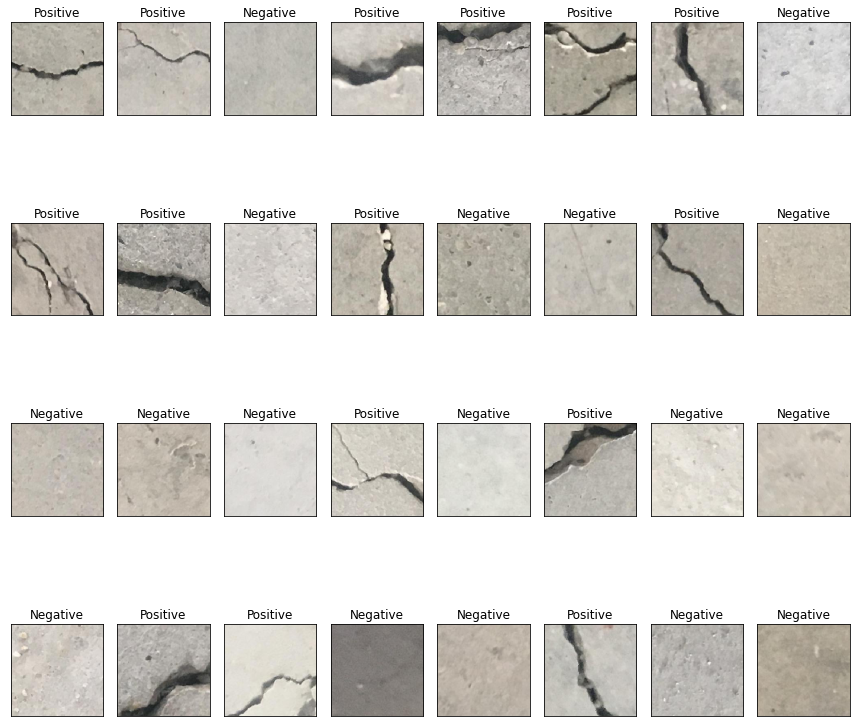

In [39]:
class_dict = { 0:'Negative', 1:'Positive' }

plt.figure(figsize=(12,12))

for i in range(len(label)):

    plt.subplot(4, 8, i+1)
    plt.title(str(class_dict[label[i]]))
    plt.xticks([]);  plt.yticks([])

    plt.imshow(data[i])

plt.tight_layout()
plt.show()

In [40]:
class_nums = train_generator.num_classes 
input_=Input(shape=(IMG_WIDTH,IMG_HEIGHT,3))
x=Conv2D(32,(3,3),activation='relu',padding='same')(input_)
x=MaxPool2D(pool_size=(2,2))(x)
x=Dropout(0.25)(x)

x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=MaxPool2D(pool_size=(2,2))(x)
x=Dropout(0.25)(x)

x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=MaxPool2D(pool_size=(2,2))(x)
x=Dropout(0.25)(x)

x=GlobalAveragePooling2D()(x)

x=Dense(512,activation='relu')(x)
x=Dropout(0.25)(x)
output_=Dense(class_nums,activation='softmax')(x)

model=Model(inputs=input_,outputs=output_)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                         

In [41]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['acc'])

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop=EarlyStopping(monitor='val_loss',patience=5,verbose=1)

hist=model.fit(train_generator,epochs=30,validation_data=validation_generator,callbacks=[earlystop])

Epoch 1/30
640/640 [==============================] - 48s 57ms/step - loss: 0.5089 - acc: 0.7241 - val_loss: 0.2107 - val_acc: 0.9428
Epoch 2/30
640/640 [==============================] - 34s 53ms/step - loss: 0.1188 - acc: 0.9647 - val_loss: 0.0925 - val_acc: 0.9775
Epoch 3/30
640/640 [==============================] - 34s 52ms/step - loss: 0.0826 - acc: 0.9753 - val_loss: 0.0795 - val_acc: 0.9850
Epoch 4/30
640/640 [==============================] - 34s 53ms/step - loss: 0.0704 - acc: 0.9792 - val_loss: 0.0924 - val_acc: 0.9848
Epoch 5/30
640/640 [==============================] - 34s 52ms/step - loss: 0.0644 - acc: 0.9802 - val_loss: 0.0550 - val_acc: 0.9879
Epoch 6/30
640/640 [==============================] - 35s 55ms/step - loss: 0.0592 - acc: 0.9825 - val_loss: 0.0549 - val_acc: 0.9891
Epoch 7/30
640/640 [==============================] - 34s 53ms/step - loss: 0.0548 - acc: 0.9835 - val_loss: 0.0570 - val_acc: 0.9877
Epoch 8/30
640/640 [==============================] - 34s 53ms

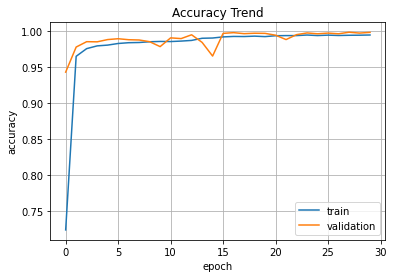

In [43]:
plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

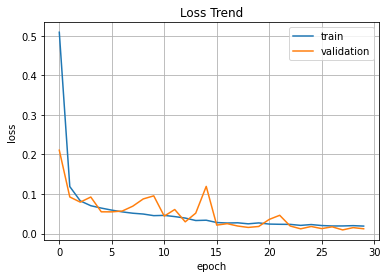

In [44]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()